# SOCIAL WEB Analytics

In [6]:
# Necessary library

library(igraph)


# Graphs

##  Creating a graph

### From data frame

In [9]:


edge=read.csv("Social network analysis.csv")
edge

vertex = read.csv("Social network analysis_Vertex.csv")
vertex


Your_name,Your_friend_name,weekly_talk_hours
<chr>,<chr>,<int>
A,B,3
A,C,4
A,D,5
E,F,6
E,B,7
F,A,8


Your_and_friend_Name,Age
<chr>,<int>
A,18
B,19
C,20
D,21
E,22
F,23


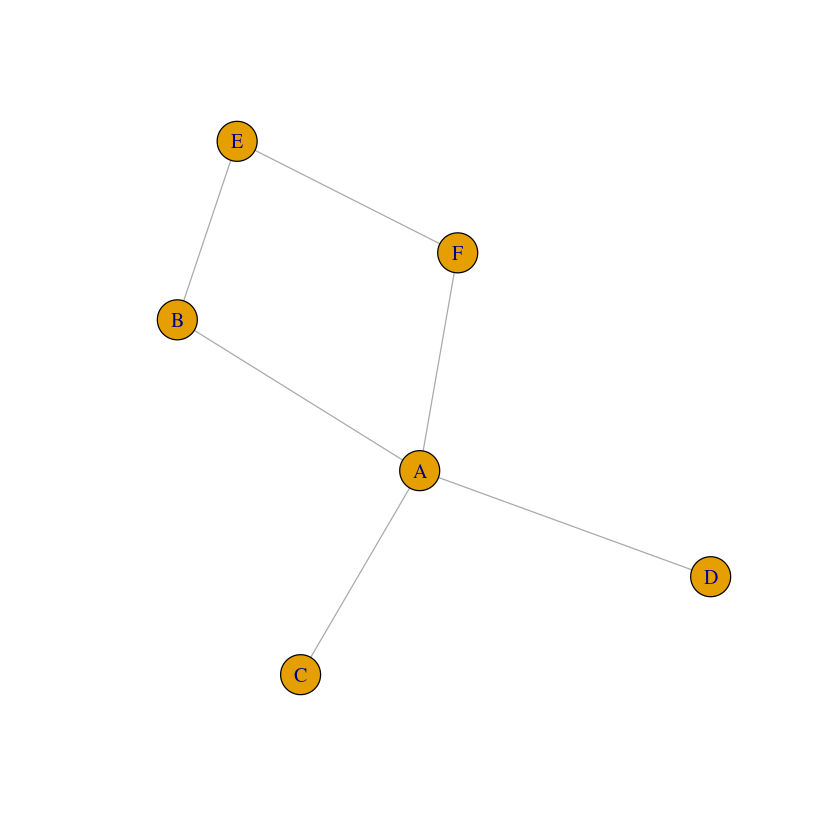

In [10]:


g1 <- graph_from_data_frame(d = edge, vertices = vertex, directed = FALSE)
plot(g1)


Choose the best layout

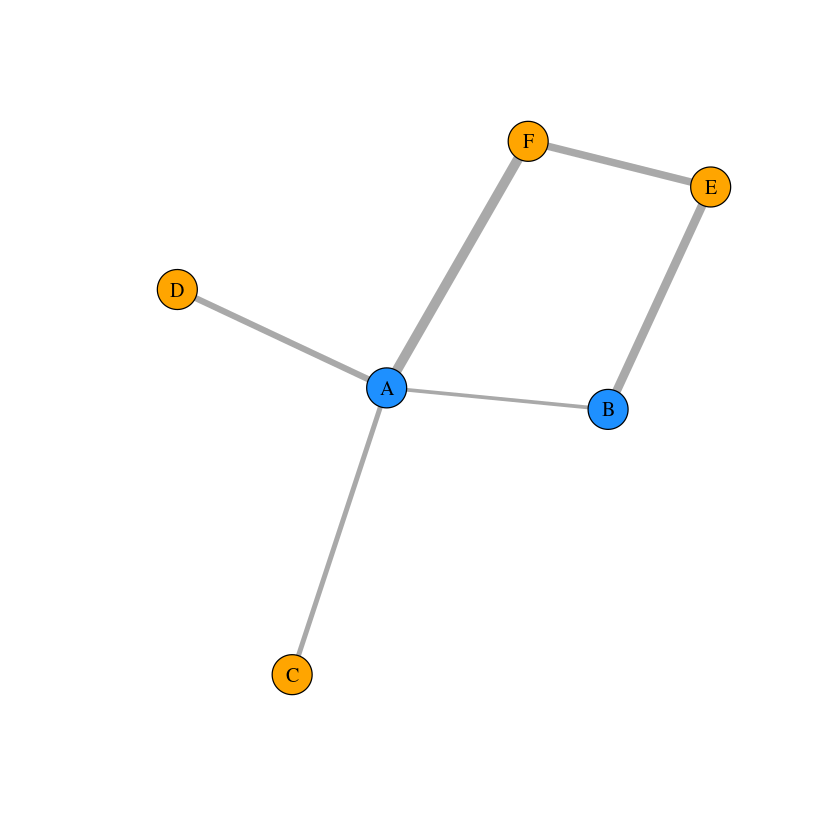

In [13]:

m1 <- layout_nicely(g1)
plot(g1, vertex.label.color = "black", layout = m1)




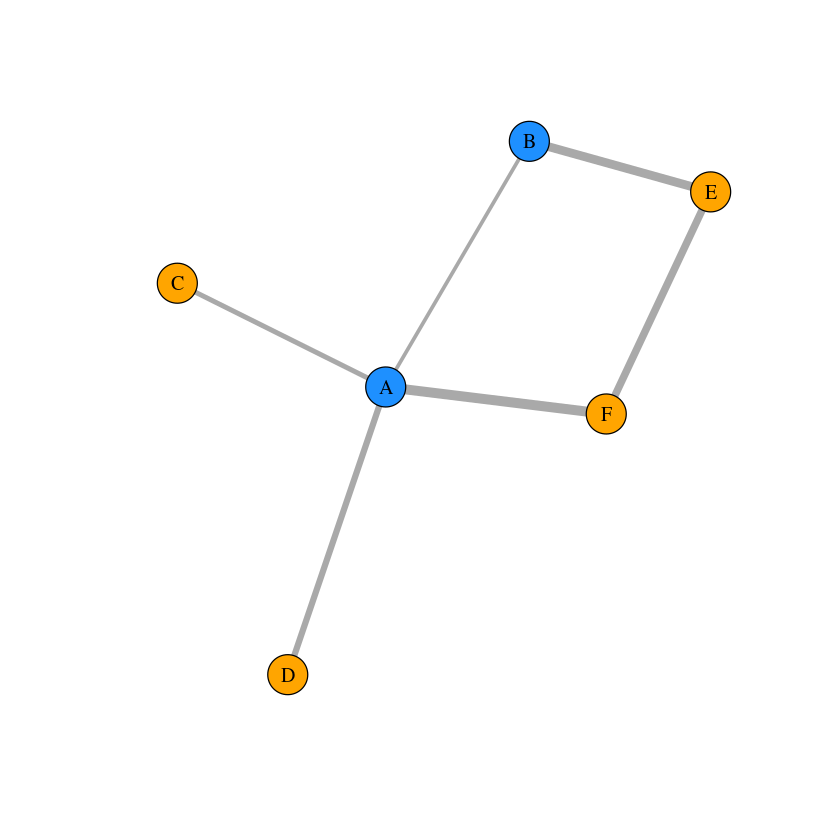

In [12]:

# Set vertex color by gender
V(g1)$color <- ifelse(V(g1)$Age >=20, "orange", "dodgerblue")
E(g1)$width <- edge$weekly_talk_hours
# Plot the graph
plot(g1, vertex.label.color = "black")




### From graph formula

We can create a graph by providing the graph.formula function with the set of vertices, and how they are connected (edges). For example:

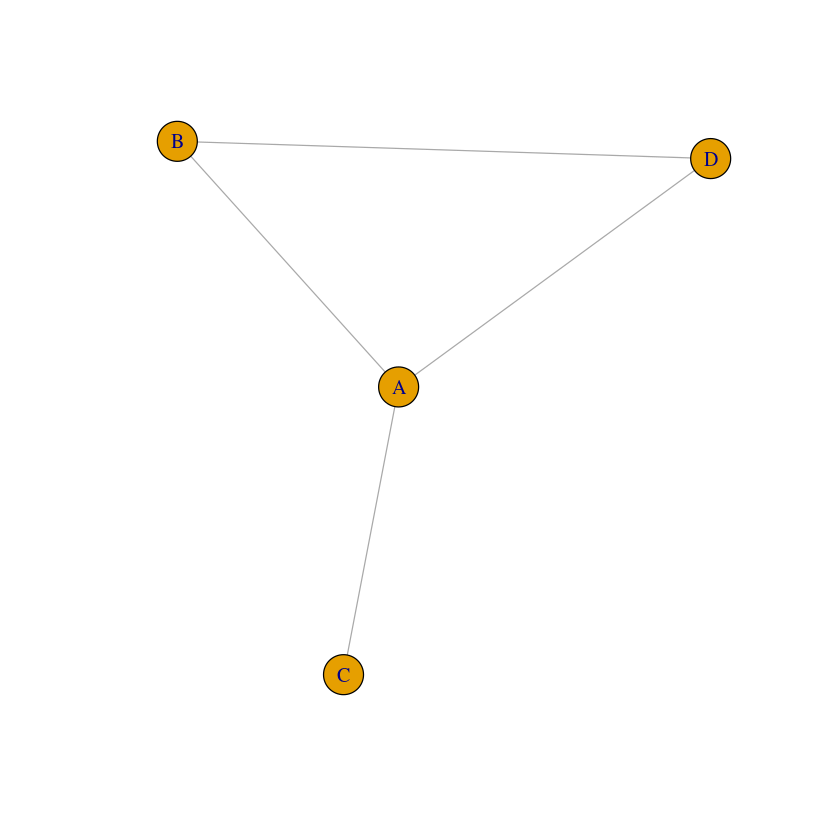

In [14]:

g1 = graph.formula(A - B, A - C, A - D, B - D)

plot(g1)



### From adjacency matrix

0,1,1,1
1,0,0,1
1,0,0,0
1,1,0,0


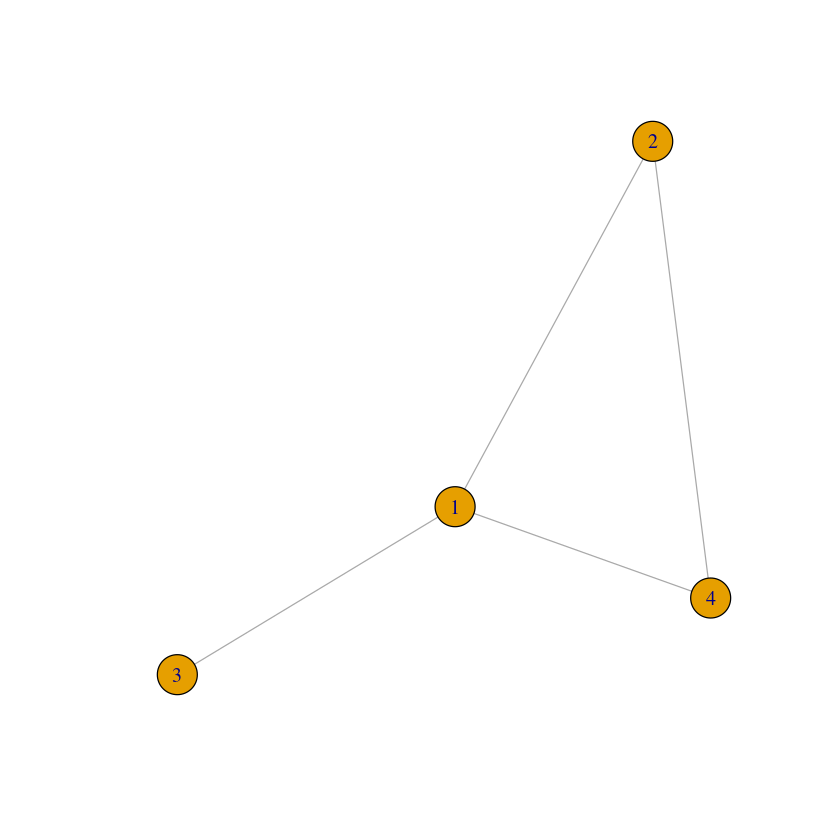

In [16]:

(A=matrix(c(0,1,1,1,1,0,0,1, 1,0,0,0, 1,1,0,0),byrow=TRUE, nrow=4))
g2 = graph.adjacency(A,mode="undirected")
plot(g2)





### From  Edge List


     [,1] [,2]
[1,] "A"  "B" 
[2,] "A"  "C" 
[3,] "A"  "D" 
[4,] "B"  "D" 


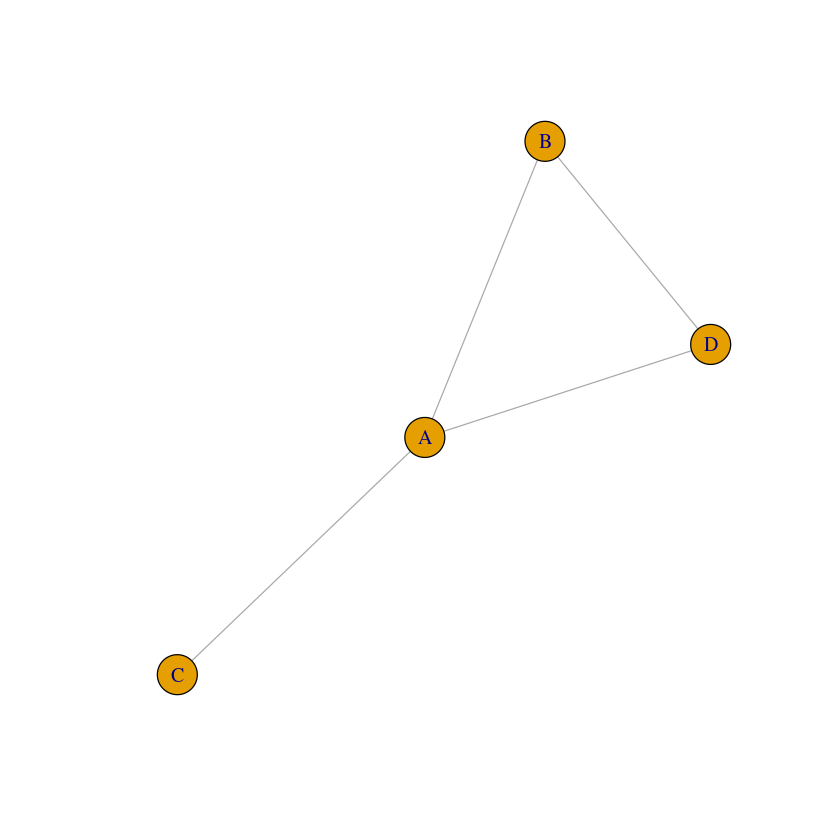

In [17]:

el = matrix(c("A", "A", "A", "B", "B", "C", "D", "D"), 4, 2)
print(el)

g4 = graph.edgelist(el, directed = FALSE)
plot(g4)




### Random graph



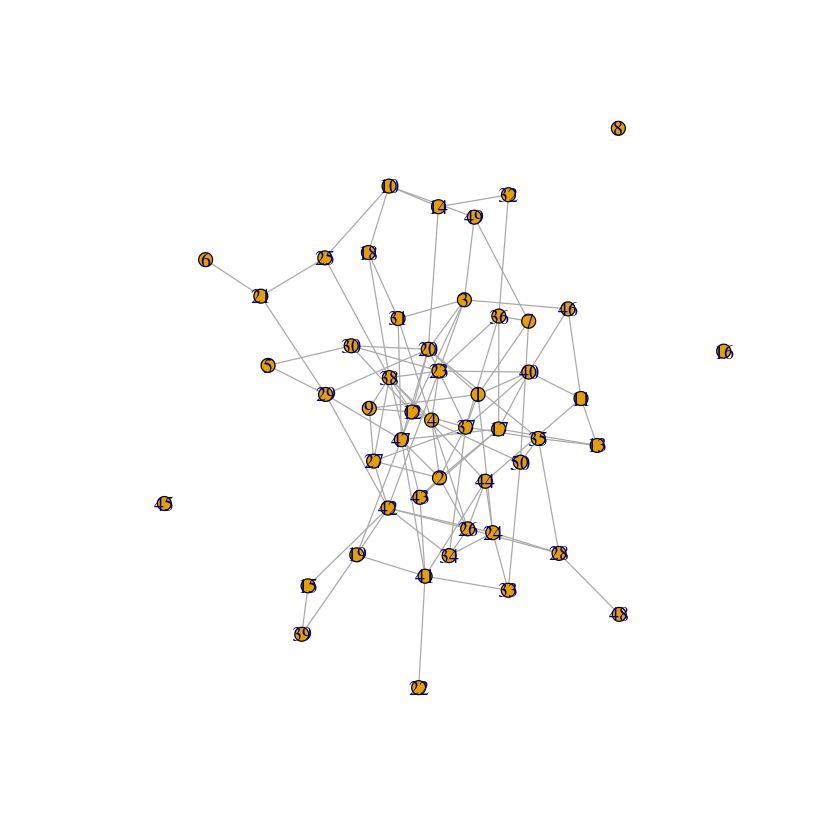

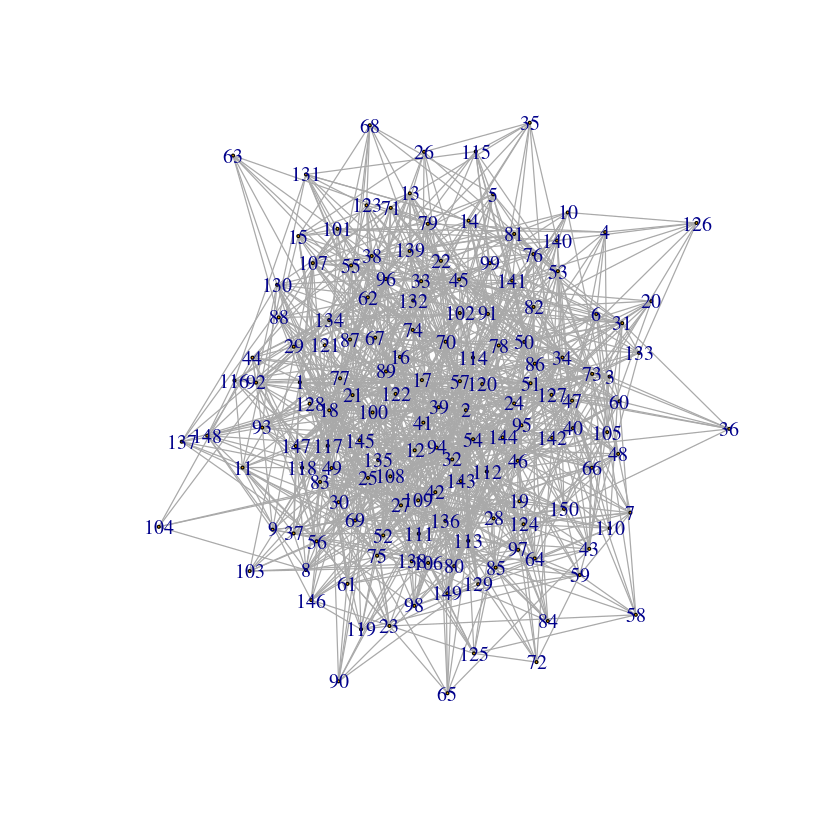

In [18]:

g.er = erdos.renyi.game(n = 50, p = 0.1)
plot(g.er, vertex.size = 5)

g.er = erdos.renyi.game(n = 150, p = 0.1)
plot(g.er, vertex.size = 1)




###  Barabási–Albert Graph

To create a Barabási–Albert Graph, we must provide 
n
 (the number of vertices). We can also provide the 
k
 (the power) and 
m
 (the number of edges to add to each new vertex).

 

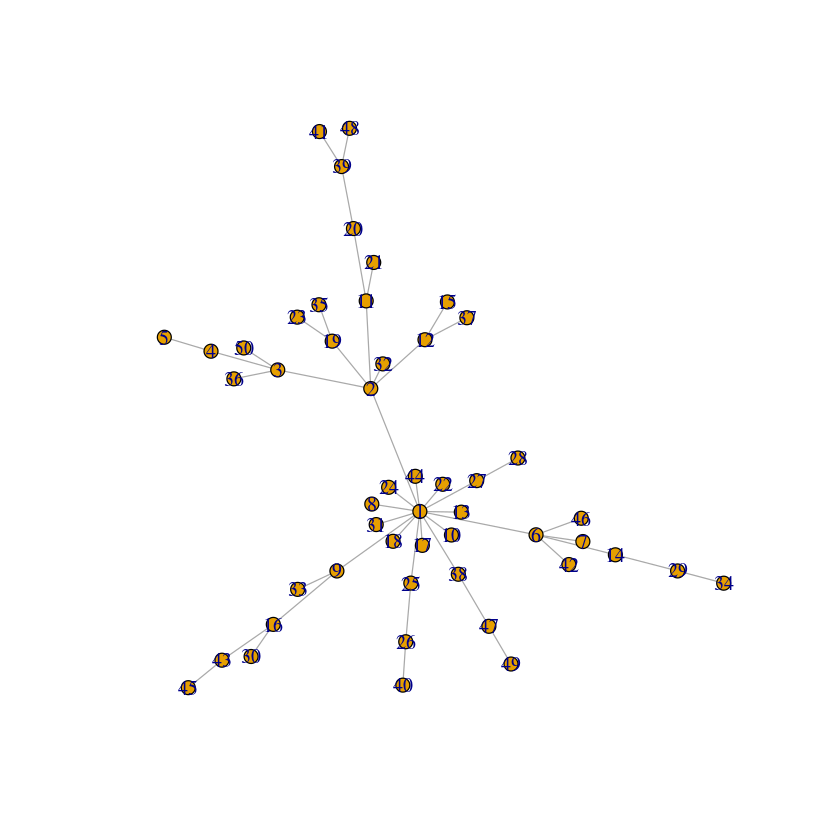

In [19]:

g.ba = barabasi.game(n = 50, directed = FALSE)
plot(g.ba, vertex.size = 5)





##  Examining the Graphs

###  Density
By visually examining the two graphs above, which looks denser? Use the function graph.density to compute the density of each graph and compare the results to your guess.


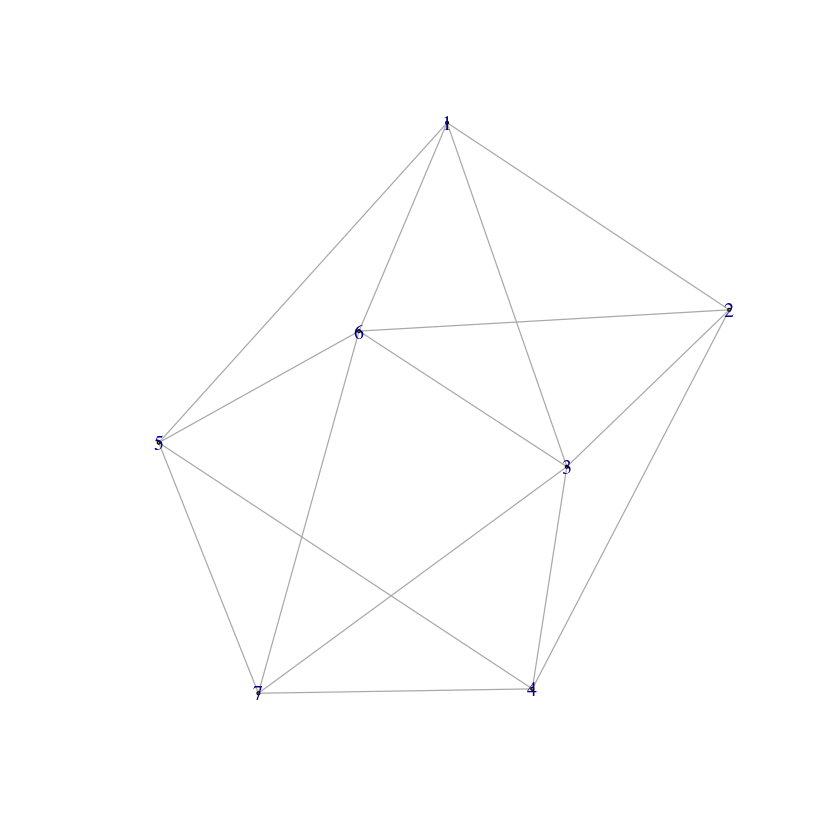

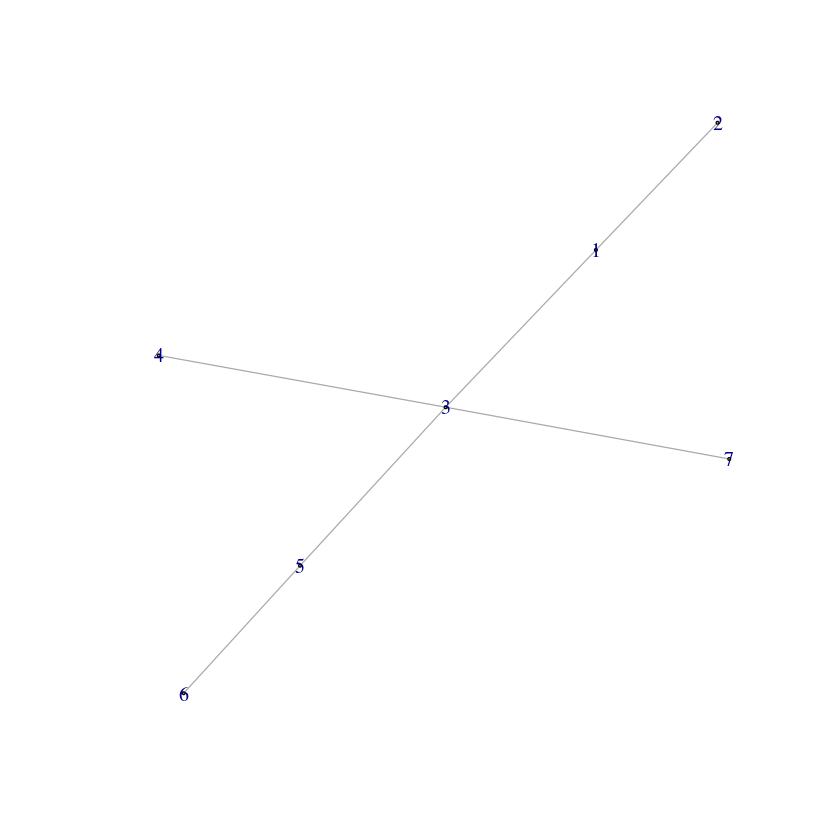

In [21]:

g.er = erdos.renyi.game(n = 7,p = 0.7)
plot(g.er,vertex.size=1)


g.ba = barabasi.game(n = 7, directed=FALSE)
plot(g.ba,vertex.size=1)



In [22]:

graph.density(g.er)
graph.density(g.ba)


[1] 0.7142857

[1] 0.2857143

###  Diameter

The diameter is the longest shortest path. Which of the two graphs do you expect to have the largest diameter? Use the function diameter to compute the diameter of each graph.




In [23]:

diameter(g.er)
diameter(g.ba)


[1] 2

[1] 4


###  Degree
What do you expect the degree distribution of each graph to look like? We can compute the degree of each vertex using the function degree. We can also compute the degree distribution of the graph using the function degree.distribution.



In [24]:

degree(g.er)

degree.distribution(g.er)



[1] 4 4 5 4 4 5 4

[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.7142857 0.2857143

In [26]:

degree(g.ba)
degree.distribution(g.ba)


[1] 2 1 4 1 2 1 1

[1] 0.0000000 0.5714286 0.2857143 0.0000000 0.1428571



### Degree Centrality

Which vertex is most central according to Degree Centrality?


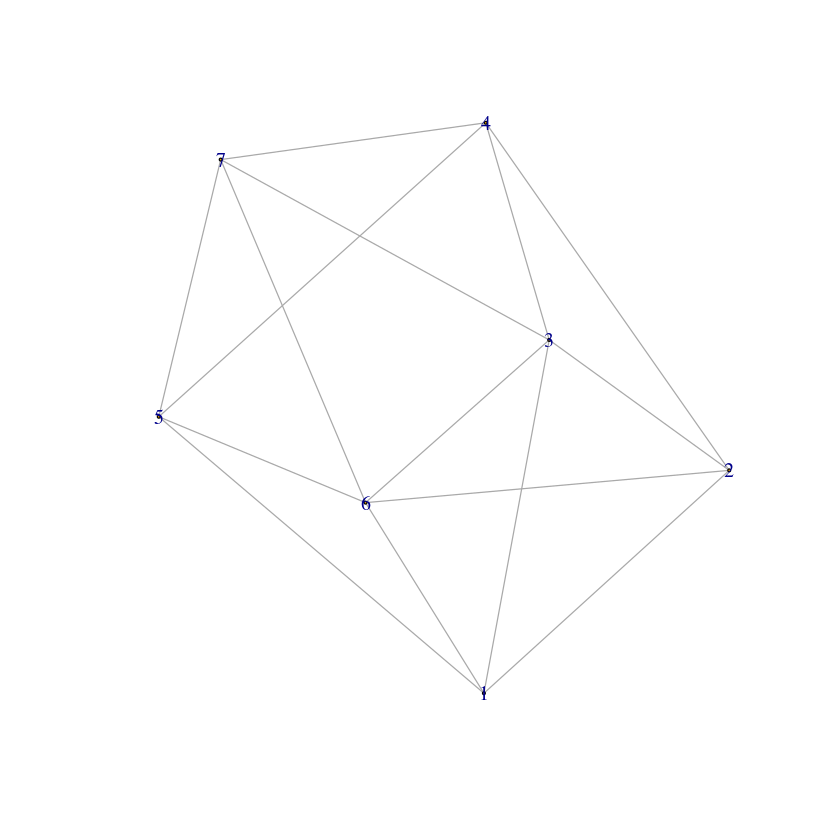

In [28]:

plot(g.er,vertex.size=1)

In [29]:

order(degree(g.er), decreasing=TRUE)

[1] 3 6 1 2 4 5 7

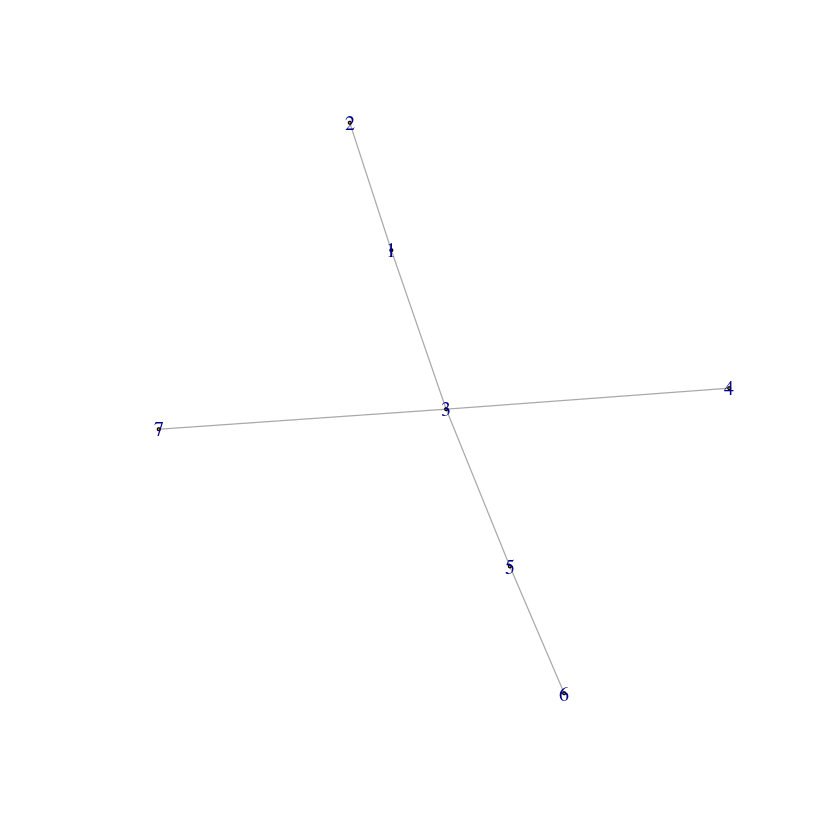

In [30]:

plot(g.ba,vertex.size=1)


In [31]:



order(degree(g.ba), decreasing=TRUE)


[1] 3 1 5 2 4 6 7



### Closeness

We defined the closeness centrality of a vertex 
v
 as the sum of the distance from 
v
 to all other vertices. To compute the closeness of each vertex, we use:


In [32]:

closeness(g.ba)

order(closeness(g.ba), decreasing = TRUE)

order(closeness(g.er), decreasing = TRUE)



[1] 0.09090909 0.06250000 0.12500000 0.07692308 0.09090909 0.06250000 0.07692308

[1] 3 1 5 4 7 2 6

[1] 3 6 1 2 4 5 7


### Betweenness
Betweenness centrality measures how often a vertex is used in the shortest paths. We can compute betweenness using:

In [33]:

betweenness(g.er)


order(betweenness(g.er), decreasing = TRUE)


order(betweenness(g.ba), decreasing = TRUE)


[1] 0.5833333 0.5833333 1.2500000 0.9166667 0.9166667 1.2500000 0.5000000

[1] 3 6 4 5 1 2 7

[1] 3 1 5 2 4 6 7